READ ME

Group Members:Ryan McDonald, Justin Drouin

This jupyter notebook loads the provided spending.csv file and clusters individuals based on their spending habits. Various cluster techniques are used including KMeans, Agglomerative clustering, and hierarchical clustering. Dendograms are analyzed in order to determine what would be a good number of clusters to separate data into and then shopping habits of individuals within clusters are predicted based on previous data trends.


**Experiments**


**1) Use read_csv() to load and examine the dataset.**

In [69]:
#Imports
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

In [70]:
spending = pd.read_csv('spending.csv')
spending

,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak
0,0,0,0,0,13,0,16,8,0,17
1,11,12,7,9,0,26,7,6,5,2
2,14,13,6,12,0,30,8,6,4,2
3,0,0,17,1,0,0,0,0,3,22
4,0,0,45,1,0,0,0,0,5,27
...,...,...,...,...,...,...,...,...,...,...
283,8,10,0,0,16,0,0,0,8,0
284,0,0,0,0,14,0,12,7,0,16
285,0,0,23,0,0,0,0,0,4,17
286,3,14,0,0,20,0,0,0,8,0


**2)Use sklearn.cluster.KMeans to cluster the dataset using the default parameters. Assign the labels_ attribute determined by the algorithm to a new column in your DataFrame. How many clusters are there?**

In [71]:
kmeans = KMeans().fit(spending)
kmeans_spending = spending
kmeans_spending['labels'] = kmeans.labels_
kmeans_spending.labels.unique()

array([5, 7, 1, 4, 6, 2, 3, 0])

There are 8 clusters produced using the sklearn KMeans default parameters.

**3)Use pandas.DataFrame.groupby() to group the data by cluster assignment, then use the GroupBy object to examine descriptive statistics such as minimum, maximum, and mean. Describe any differences you see between the clusters.**

In [72]:
kmeans_grouped_spending = kmeans_spending.groupby('labels')
kmeans_grouped_spending.min()

,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak
labels,,,,,,,,,,
0,0,0,0,0,3,0,10,0,0,19
1,7,7,4,5,0,29,0,5,1,0
2,0,0,20,0,0,0,0,0,1,23
3,1,0,0,0,8,0,0,0,5,0
4,0,0,0,0,0,0,0,0,2,17
5,0,0,0,0,4,0,10,0,0,8
6,0,0,34,0,0,0,0,0,0,23
7,6,5,5,7,0,17,2,4,1,0


In [73]:
kmeans_grouped_spending.max()

,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak
labels,,,,,,,,,,
0,0,0,0,0,18,0,20,12,0,33
1,16,16,12,20,0,44,12,12,10,6
2,0,0,34,6,0,0,0,0,8,45
3,14,17,0,0,22,0,0,0,15,0
4,0,0,23,5,0,0,0,0,8,36
5,0,0,0,0,16,0,18,9,0,20
6,0,0,50,8,0,0,0,0,8,44
7,18,13,12,16,0,28,15,12,8,6


In [74]:
kmeans_grouped_spending.mean()

,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak
labels,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,11.769231,0.00000,14.692308,4.519231,0.000000,23.711538
1,11.343750,9.968750,7.781250,12.875000,0.000000,32.84375,7.093750,7.750000,4.125000,2.687500
2,0.000000,0.000000,28.228571,2.571429,0.000000,0.00000,0.000000,0.000000,4.685714,29.542857
3,7.064516,7.435484,0.000000,0.000000,14.661290,0.00000,0.000000,0.000000,9.532258,0.000000
4,0.000000,0.000000,14.125000,1.937500,0.000000,0.00000,0.000000,0.000000,4.062500,26.250000
5,0.000000,0.000000,0.000000,0.000000,10.361702,0.00000,14.276596,4.106383,0.000000,16.063830
6,0.000000,0.000000,39.208333,2.750000,0.000000,0.00000,0.000000,0.000000,4.333333,30.416667
7,11.850000,9.850000,7.800000,12.000000,0.000000,24.30000,6.900000,7.500000,4.050000,2.750000


Clusters labeled 0 and 6 both seem very similar in that they are the only two clusters with diapers purchased. Clusters 4 and 5 also seem very similar with just varying amounts in the beer category while being relatively similar in each other category. Clusters 2,3 and 7 also seem to be very similar in each of the categories while the values just vary within each cluster. Cluster 1 seems unique to most other clusters. It appears that it might be better sorted with 4 clusters as opposed to 8.

**4)There’s no particular reason to think that the default value of K is the correct one for this dataset. Let’s switch to hierarchical clustering to see if we can visualize how the data clusters together.**

**Plot a scipy.cluster.hierarchy.dendrogram() for the dataset using each of the types of linkage described in Table 10.2 of An Introduction to Statistical Learning.**

**Based on the dendrogram, how many clusters appear to be present in the dataset? You may need to plot several dendrograms before the answer becomes clear.**

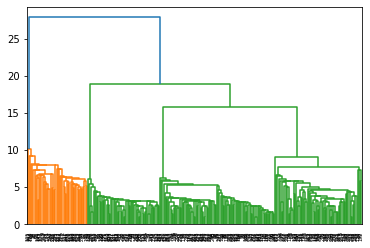

In [75]:
#Single Linkage Cluster
single_cluster_spending = hierarchy.linkage(spending, 'single')
plt.figure()
dn = hierarchy.dendrogram(single_cluster_spending)
plt.show()

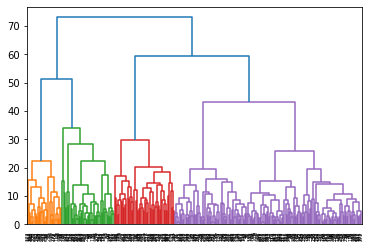

In [76]:
#Complete Linkage Cluster
complete_cluster_spending = hierarchy.linkage(spending, 'complete')
plt.figure()
dn = hierarchy.dendrogram(complete_cluster_spending)
plt.show()

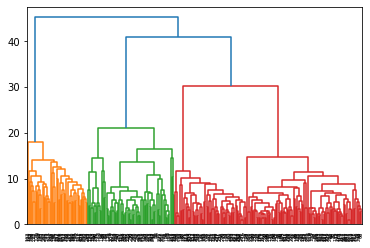

In [77]:
#Average Linkage Cluster
average_cluster_spending = hierarchy.linkage(spending, 'average')
plt.figure()
dn = hierarchy.dendrogram(average_cluster_spending)
plt.show()

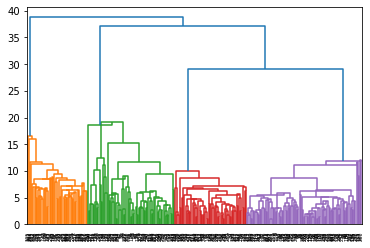

In [78]:
#Centroid Linkage Cluster
centroid_cluster_spending = hierarchy.linkage(spending, 'centroid')
plt.figure()
dn = hierarchy.dendrogram(centroid_cluster_spending)
plt.show()

Based on the dendograms above it looks as though there are 4 clusters present in the dataset. This corresponds to the information when analyzing the kmeans_grouped_spending from experiment 2.

**5)Repeat experiment (2) using the number of clusters you determined to be present in experiment (4).**

In [79]:
four_clusters_kmeans = KMeans(4).fit(spending)
four_clusters_kmeans_spending = spending
four_clusters_kmeans_spending['labels'] = four_clusters_kmeans.labels_

**6)Now switch to sklearn.cluster.AgglomerativeClustering() and repeat for the same number of clusters. How do the label assignments compare for the two algorithms?**

In [80]:
agglom_clustering = AgglomerativeClustering(4).fit(spending)
agglom_clustering_spending = spending
agglom_clustering_spending['labels'] = agglom_clustering.labels_

In [81]:
four_clusters_kmeans_spending['labels'].value_counts()

1    99
0    75
3    62
2    52
Name: labels, dtype: int64

In [82]:
agglom_clustering_spending['labels'].value_counts()

1    99
0    75
3    62
2    52
Name: labels, dtype: int64

It appears that for this dataset, both the agglomerative clustering and the kmeans clustering generate the same label assignments when the number of clusters is set ahead of time.

**7)Repeat experiment (3) with the clusters you obtained in experiment (5). How would you describe the various types of customers? What can you determine about them based on the data?**

In [83]:
four_clusters_kmeans_grouped_spending = kmeans_spending.groupby('labels')
four_clusters_kmeans_grouped_spending.min()

,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak
labels,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,17
1,0,0,0,0,3,0,10,0,0,8
2,6,5,4,5,0,17,0,4,1,0
3,1,0,0,0,8,0,0,0,5,0


In [84]:
four_clusters_kmeans_grouped_spending.max()

,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak
labels,,,,,,,,,,
0,0,0,50,8,0,0,0,0,8,45
1,0,0,0,0,18,0,20,12,0,33
2,18,16,12,20,0,44,15,12,10,6
3,14,17,0,0,22,0,0,0,15,0


In [85]:
four_clusters_kmeans_grouped_spending.mean()

,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak
labels,,,,,,,,,,
0,0.000000,0.000000,28.733333,2.493333,0.00000,0.000000,0.000000,0.000000,4.440000,29.120000
1,0.000000,0.000000,0.000000,0.000000,11.10101,0.000000,14.494949,4.323232,0.000000,20.080808
2,11.538462,9.923077,7.788462,12.538462,0.00000,29.557692,7.019231,7.653846,4.096154,2.711538
3,7.064516,7.435484,0.000000,0.000000,14.66129,0.000000,0.000000,0.000000,9.532258,0.000000


**Summary of information about customers in each cluster.**


The cluster labeled 0: Everyone in cluster one purchased steak, with some purchasing potatoes and bread, but not a large amount, and a large amount of beer. No fruits, brocolli, diapers or dairy were present in anyone in this cluster.


The cluster labeled 1: Everyone in cluster 2 also purchased some steak while most also purchased milk, eggs and broccoli. Within this group nobody made any purchases of bread, fruits, or vegetables.


The cluster labeled 2: Individuals in cluster 3 appeared to have a child as everyone within this cluster has diaper purchases. This group also has the most variety of items pruchased as the only item with a mean of 0 is broccoli. 


The cluster labeled 3: Individuals in cluster 4 only purchased fruits and vegetables without making any other purchases in the other categories.


**8)For each customer segment identified, suggest some other items they would and would not be likely to purchase in future shopping trips.**


Individuals in cluster zero would be very likely to purchase steak and beer, a little likely to purchase bread and potatoes and not likely at all to purchase any other items.


Individuals in cluster one would be very likely to purchase steak, eggs and broccoli, a little likely to purchase milk, and not likely at all to purchase any other items.


Individuals in cluster two would be almost guaranteed to purchase diapers, and very likely to purchase any items in the store besides brocolli.


Individuals in cluster three would be very likely to purchase fruits and vegetables such as apples,bananas, broccoli, and potatoes, but not likely at all to make any other purchases of items in other categories.